In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten

2024-11-08 10:33:58.532727: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file = h5py.File('preprocessed.h5', 'r')

x = file['x'][:]
y = file['y'][:]

x.shape, y.shape

((1043488, 4915), (1043488,))

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((834790, 4915), (834790,), (208698, 4915), (208698,))

In [4]:
sequence_size = 4915
embedding_size = 3
vocabulary_size = 1024

model = Sequential([
    Input(shape=(sequence_size,)),
    Embedding(input_dim=vocabulary_size, output_dim=embedding_size),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4915, 3)           3072      
                                                                 
 flatten (Flatten)           (None, 14745)             0         
                                                                 
 dense (Dense)               (None, 1)                 14746     
                                                                 
Total params: 17818 (69.60 KB)
Trainable params: 17818 (69.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
optimizer = Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','mse'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=8, batch_size=2**14)
model.save('model_e3.keras')

Epoch 1/8
51/51 [==============================] - 146s 3s/step - loss: 0.6923 - accuracy: 0.5155 - mse: 0.2496 - val_loss: 0.6914 - val_accuracy: 0.5221 - val_mse: 0.2491
Epoch 2/8
51/51 [==============================] - 134s 3s/step - loss: 0.6910 - accuracy: 0.5224 - mse: 0.2489 - val_loss: 0.6903 - val_accuracy: 0.5268 - val_mse: 0.2486
Epoch 3/8
51/51 [==============================] - 133s 3s/step - loss: 0.6893 - accuracy: 0.5317 - mse: 0.2481 - val_loss: 0.6875 - val_accuracy: 0.5435 - val_mse: 0.2472
Epoch 4/8
51/51 [==============================] - 138s 3s/step - loss: 0.6847 - accuracy: 0.5634 - mse: 0.2458 - val_loss: 0.6807 - val_accuracy: 0.6257 - val_mse: 0.2438
Epoch 5/8
51/51 [==============================] - 137s 3s/step - loss: 0.6751 - accuracy: 0.6284 - mse: 0.2410 - val_loss: 0.6682 - val_accuracy: 0.6689 - val_mse: 0.2376
Epoch 6/8
51/51 [==============================] - 146s 3s/step - loss: 0.6605 - accuracy: 0.6835 - mse: 0.2338 - val_loss: 0.6516 - val_acc

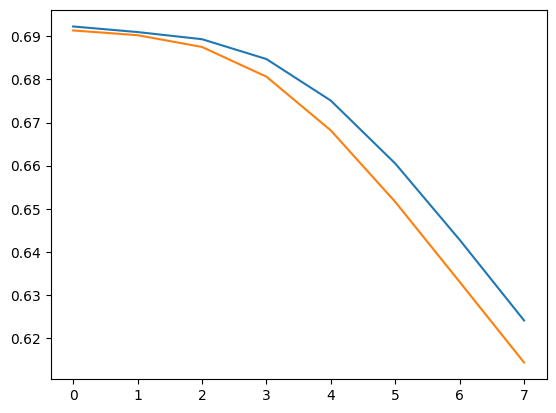

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
 
plt.show()

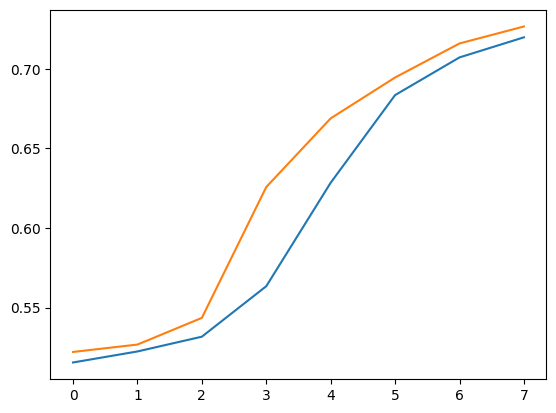

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

In [9]:
model.get_weights()

[array([[ 0.02503297, -0.0073746 , -0.03826781],
        [ 0.00772304,  0.00595738,  0.00532353],
        [-0.02572587,  0.01775007, -0.0487338 ],
        ...,
        [ 0.04215574,  0.0553745 , -0.00989262],
        [ 0.01587057, -0.01960571,  0.02628991],
        [ 0.04678351,  0.01512128,  0.02727472]], dtype=float32),
 array([[ 0.01259043],
        [ 0.00829349],
        [ 0.01596919],
        ...,
        [ 0.02124774],
        [-0.00941248],
        [ 0.00463928]], dtype=float32),
 array([0.00262921], dtype=float32)]